**Part 3 - Mapping Closure in 3D for f_WBZ using the IEM**

This notebook implements the interaction by exchange with the mean model (VCIEM) as discussed by (Pope, S.B. 2010), in order to obtain a closure for the Boussinesq equations.

*Deterministic equations*

We solve the Boussinesq equations

\begin{align}
    \frac{D \boldsymbol{U} }{Dt} &= -\nabla P + Ri_B \, B \boldsymbol{\hat{z}} + Re^{-1} \Delta \boldsymbol{U} + \boldsymbol{U}/\langle |\boldsymbol{U}|^2 \rangle, \\
    \frac{D B }{Dt}              &= -W + Pe^{-1} \Delta B, \\  
    \nabla \cdot \boldsymbol{U}  &= 0, 
\end{align}

in a periodic domain subject to the Lundgren forcing $F^* = \epsilon \boldsymbol{U}/\langle |\boldsymbol{U}|^2 \rangle$, where $B$ is the buoyancy perturbation from the stably stratified base state, $Re$ the Reynolds number and $Pe = Pr Re$ the Peclet number. Letting the (eventual) dissipation rate be defined by $\epsilon$, we choose the scales

\begin{equation}
L^* = L, \quad U^* = (\epsilon L)^{1/3}, \quad t^* = L^{(2/3)} \epsilon^{(-1/3)},
\end{equation}

giving

\begin{equation}
Ri_B = N^2 L^{4/3} / \epsilon^{(2/3)}, \quad Re   = \epsilon^{1/3} L^{4/3} / \nu, \quad Pr = \nu/\kappa,
\end{equation}

where $N^2 = dB/dz$ is the Brunt-Vaisala frequency. These parameters are related to those of A. Maffioli et al. JFM (2016) by 

\begin{equation}
Fr^2 = 1/Ri_B, \quad  Re_B = Re Fr^2.
\end{equation}

*PDF equations*

We model the time evolution of the PDF $f_{\boldsymbol{Y}}$ in terms of the random variables $\boldsymbol{Y} = (W,B,Z)$ which gives the evolvution equation

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} + \frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) =   
    - \frac{\partial }{\partial b} \left( \left[ -w + Pe^{-1} \mathbb{E}_{\boldsymbol{Y}}[ \Delta B ] \right] f_{\boldsymbol{Y}} \right) 
    - \frac{\partial }{\partial w} \left( \left[ \mathbb{E}_{\boldsymbol{Y}}[ Ri_B B -\nabla_Z P] +  \mathbb{E}_{\boldsymbol{Y}}[ \frac{W}{\langle |\boldsymbol{U}|^2 \rangle}] + Re^{-1} \mathbb{E}_{\boldsymbol{Y}}[ \Delta W ] \right] f_{\boldsymbol{Y}} \right). %
\end{equation}


Terms $\mathbb{E}_{\boldsymbol{Y}}[\Delta B ]$ and $\mathbb{E}_{\boldsymbol{Y}}[\Delta W ]$ are responsible for micro-scale molecular mixing locally in buoyancy space and for viscous dissipation in velocity space, $\mathbb{E}_{\boldsymbol{Y}}[-\nabla_Z P ]$ is responsible for ensuring incompressibility, and $\mathbb{E}_{\boldsymbol{Y}}[ \frac{W}{\langle |\boldsymbol{U}|^2 \rangle}]$ arises from the Lundgren forcing.

<!-- , while in a bounded domain it is more convinient to express the previous equation as

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} + \frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) = - \frac{\partial }{\partial b} \left( Q(B) f_{\boldsymbol{Y}} \right) -  \frac{\partial }{\partial w} \left( \mathbb{E}_{\boldsymbol{Y}}[ B \boldsymbol{\hat{z}} -\nabla P ] f_{\boldsymbol{Y}} \right) - \frac{\partial^2 }{\partial b^2} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla B|^2 ] f_{\boldsymbol{Y}} \right) - \frac{\partial^2 }{\partial w^2} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla W|^2 ] f_{\boldsymbol{Y}} \right) - 2 \frac{\partial^2 }{\partial w \partial b} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha \nabla W \cdot \nabla B ] f_{\boldsymbol{Y}} \right) + \frac{\partial^2 }{\partial z^2} f_{\boldsymbol{Y}},
\end{equation}

in order to expose the boundary conditions on $W$ and $B$.  -->

*Closed evolution equation*

Letting $\alpha_B = \frac{(1 + \lambda_B(z))}{Pe \, \tau_{B}(t)}, \; \alpha_W = \frac{(1 + \lambda_W(z))}{Re \, \tau_{W}(t)}$, using the Reynolds decomposition for the pressure 


\begin{equation}
P(z,t) = \mathbb{E}_Z[P](z,t) + P'(z,t)
\end{equation}

such that

\begin{equation}
    \mathbb{E}_{\boldsymbol{Y}}[\nabla_Z P] = \nabla_Z \mathbb{E}_{Z}[P] + \mathbb{E}_{\boldsymbol{Y}}[\nabla_Z P']
\end{equation}

and substituting the closures for the unknown terms from the previous notebooks we obtain

\begin{equation*}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} + \frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) = - \frac{\partial }{\partial b} \left( \left[-w - \alpha_B \left( b - \mathbb{E}_{WZ}[B] \right) \right] f_{\boldsymbol{Y}} \right) - \frac{\partial }{\partial w} \Bigg( \left[ Ri_B \, b - \frac{\partial}{\partial z}\mathbb{E}_{Z}[P]  + \frac{w}{\mathbb{E}[W^2]} - \alpha_W \left( w - \mathbb{E}_{Z}[W] \right) \right]  f_{\boldsymbol{Y}} \Bigg) + \frac{\sigma_W^2}{2} \frac{\partial^2 f_{\boldsymbol{Y}}}{\partial w^2},
\end{equation*}
which is an integro-differential equation, as

\begin{equation}
\mathbb{E}_{WZ}[B] = \int b f_{B|WZ}(b|w,z;t) db, \qquad \mathbb{E}_{Z}[B] = \int b f_{B|Z}(b|z;t) dw.
\end{equation}

depends on the PDF at each time-instant. Here we have approximated $\mathbb{E}_{\boldsymbol{Y}}[ \langle |\boldsymbol{U}|^2 \rangle^{-1}] \approx 1/\mathbb{E}[W^2]$.

[def]: z,t

*Particle-Pressure field*

In order to determine the mean particle-pressure field $\mathbb{E}_Z[P]$, we must enforce a constraint. Integrating the previous equation with respect to $w$ and $b$ one obtains

\begin{equation}
    \frac{\partial f_{Z} }{\partial t} + \frac{\partial }{\partial z} \left( \mathbb{E}_Z[W] f_{Z} \right) = 0.
\end{equation}

As $f_Z = 1/L_Z$ is constant this yields $\frac{\partial }{\partial z} \left( \mathbb{E}_Z[W] \right) = 0$. Forming an equation for $\mathbb{E}_Z[W]$ we obtain

\begin{equation*}
    \frac{\partial }{\partial t} \mathbb{E}_Z[W] + \frac{\partial }{\partial z} \mathbb{E}_Z[W^2] = Ri_B \mathbb{E}_Z[B] - \frac{\partial}{\partial z}\mathbb{E}_{Z}[\bar{P}]  + \frac{\mathbb{E}_Z[W]}{\mathbb{E}[W^2]}.
\end{equation*}

Differentiating this equation w.r.t $z$ and rearranging we obtain

\begin{equation*}
    \frac{\partial^2}{\partial z^2}\mathbb{E}_{Z}[P] = - \frac{\partial^2 }{\partial z^2} \mathbb{E}_Z[W^2] + Ri_B \frac{\partial }{\partial z} \mathbb{E}_Z[B],
\end{equation*}

which as our domain is periodic must be solved subject to the integral constraint $\int \mathbb{E}_Z[P] dz = 0$.

*Numerical formulation*

Following (Pope, S.B. 1985) we employ a finite-difference scheme in time $t$ and a Monte-Carlo approach in probability space $w,b$ amd physical space $z$ such that at each time-instant $t_i$ the density $f_{\boldsymbol{Y}}(w,b,z;t=t_i)$ is instead represented by an ensemble of $N$ particles, where the $n^{th}$ particle and time $t^i$ is given by $\boldsymbol{Y}^n_{t_i} = (w^n_{t_i}, b^n_{t_i}, z^n_{t_i})$. Corresponding the the Fokker-Planck equation there is the system of SDEs

\begin{align*}
d W_t &= (Ri_B \, B_t - \nabla_Z \mathbb{E}_{Z}[P]) + w/\mathbb{E}[W_t^2] - \alpha_W \left( W_t - \mathbb{E}_{Z}[W_t] \right) + \sigma_W d \mathcal{W}_t, \\
d B_t &= -W_t - \alpha_B \left( B_t - \mathbb{E}_{WZ}[B_t] \right), \\
d Z_t &= W_t,
\end{align*}

where $d \mathcal{W}_t$ is a Brownian motion. These coupled equations are solved subject to several integral constraints by time-stepping using a first order Euler-Maruyama scheme.


*Boundary/Integral conditions*

- $W_t$: As the velocity is subject to an unbounded noise we do not need to impose boundary conditions on the velocity. However, as the domain is periodic we do impose $\mathbb{E}[W]=0$. Although we could impose the incompressibility condition $\mathbb{E}_Z[W]=0$, by solving for the mean particle-pressure field $\mathbb{E}_Z[P]$ this does not ensure the density of the $\{z^n_{t_i}\}$ particles $f_{Z_{t_i}}(z) = 1$. On the other hand if we enforce $f_Z(z) = 1$ then incompressibility follows.

- $B_t$: As the buoyancy-perturbation $B_t$ is solved for in a periodic domain and therefore does not attain its maximum on the boundary we do not specify boundary conditions but rather the global constraint $\mathbb{E}[B] = 0$. 
<!-- Although we have not included turbulent diffusion for the buoyancy this can be incorporated using a bounded noise following (Valiano & Dopazo, 1991).

    \begin{align}
    B_t &= b_{max} - (B_t - b_{max}), \\
    B_t &= b_{min} + (b_{min} - B_t).
    \end{align} -->

- $Z_t$: As the domain is periodic with $z^n_{t_i} \in [0,1)$ we update this variable as

    \begin{equation}
    \tilde{z}^n = z^n_{t_i} + \Delta t \, w^n_{t_i} \; \text{mod} \; 1,
    \end{equation}

    however as this equation does not ensure the density of the $\{\tilde{z}^n\}$ particles $f_{\tilde{Z}}(z) = 1$, a refined approach is required.

**Setup**

We first import the required libraries to implement this model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from scipy.integrate import cumulative_trapezoid, simpson

import os, sys
sys.path.append(os.path.abspath("../../"))


We then define a computation grid for $f_Y(w, b,z;t)$ in terms of $w,b,z$. When defining the $f^n_Y(w,b,z) = f_Y(w,b,z,t=t_n)$ we use 3 dimensional arrays where axis 0 is $w$, the axis 1 is $b$ and the third axis is $z$.

In [2]:
# Parameters
Re = 10 #7.5*(10**3)
Fr = 1.6/(10**2)
Ri_B = 1/(Fr**2)
Pr = 1
Pe = Pr*Re

print('Buoyancy Reynolds number:', Re*(Fr**2))

# Buoyancy diffusion
ω_B = 1
λ_B = 0
α_B = ω_B*(1 + λ_B)/Pe

# Vertical velocity diffusion
ω_W = 1
λ_W = 0
α_W = ω_W*(1 + λ_W)/Re

# Diffusion
ε  = 1
σ_w = 1e-01

Buoyancy Reynolds number: 0.0025599999999999998


To enable the efficient estimation of conditional means we also write a function based on kernel density estimation (KDE) which expresses the density as

\begin{equation}
    f_{N}(w, b,z) = \frac{1}{N} \sum_{n=1}^N K_h(w - w^n) K_h(b - b^n) K_{hp} (z - z^n)
\end{equation}

where $K_h(x - x')$ is a kernel function with the properties

\begin{equation}
    \int_{-\infty}^{\infty} K_h(x - x') dx = 1, \quad \underset{h \to 0}{\text{lim}} \; K_h(x - x') = \delta(x - x').
\end{equation}

and the modified kernel 

\begin{equation}
    K_{hp}(x - x') = \sum_{k = -1}^1 K_hp(x - x' + k L),
\end{equation}

such that the density $f_N(z) = \frac{1}{N} \sum_{n=1}^N K_{hp} (z - z^n)$ is periodic, with period $L$, by construction.

To evaluate conditional means we can then write

\begin{equation}
    \mathbb{E}_{N}[B | Z=z] = \int b  f_{N}(b|z) db = \int b  \frac{f_{N}(b,z)}{f_{N}(z)} db = \frac{\frac{1}{N} \sum_{n=1}^N \overbrace{\left( \int b K_h (b - b^n) db \right)}^{:= b^n} K_{hp} (z - z^n)}{\underbrace{\frac{1}{N} \sum_{l=1}^N K_h (z - z^l)}_{:=1}} = \frac{1}{N} \sum_{n=1}^N b^n K_{hp} (z - z^n),
\end{equation}

The KDE estimate of the density and the conditional mean are related to the true density by

\begin{equation}
    \underset{h \to 0}{\text{lim}} \; \mathbb{E}[f_{N}(w,b,z)] = f(w,b,z).
\end{equation}

As $h \sim N^{-1/5}$, this limit is approached as we increase the number of particles used. A naive implementation of this is given below which requires $\mathcal{O}(N^2)$ operations.

<!-- or equivalently

\begin{equation}
    \mathbb{E}_{N}[B | W=w, Z=z] = \int b  f_{N}(b|w,z) db = \int b  \frac{f_{N}(b,w,z)}{f_{N}(w,z)} db = \frac{\frac{1}{N} \sum_{n=1}^N b^n K_h(w - w^n) K_h (z - z^n)}{\frac{1}{N} \sum_{l=1}^N K_h(w - w^l) K_h (z - z^l)}
\end{equation} -->

In [3]:
# Inefficient but elegant kernel density estimation

def K_hp(x, h=0.1, L=1):
    """Wrapped Gaussian kernel for periodic KDE"""
    sum_terms = np.zeros_like(x)
    for k in [-1, 0, 1]:
        diff = x + k * L
        sum_terms += np.exp(-0.5 * (diff / h)**2)
    return sum_terms / (np.sqrt(2 * np.pi) * h)

def K_h(x, h=0.1):
    """Standard Gaussian kernel"""
    return np.exp(-0.5 * (x / h)**2) / (h * np.sqrt(2 * np.pi))

def density_estimate(X_points, x_grid, h=0.1):
    """
    Kernel density estimation for the joint density of X.

    Parameters:
    X_points : numpy.ndarray
        Input array.
    x_grid : numpy.ndarray
        Grid points for density estimation.
    h : float
        Bandwidth parameter.

    Returns:
    f_Z : numpy.ndarray
        density estimate.
    """

    N   = len(X_points)
    f_X = np.zeros_like(x_grid)

    for i, x in enumerate(x_grid):
        f_X[i] = (1/N) * sum([K_hp(x - X_points[n], h) for n in range(N)])
        
    return f_X

def conditional_mean(Y, X):
    
    """
    Conditional mean E[Y|X=x] using a kernel density estimator.

    Parameters:
    X, Y : numpy.ndarray
        Input arrays representing the variables.
    Returns:
    numpy.ndarray
        Joint density estimate.
    """         
    
    EY_cX = 0*X
    N     = len(X) 

    for i, x in enumerate(X):
        numerator = sum(Y[n] * K_hp(x - X[n]) for n in range(N))
        denominator = sum(K_hp(x - X[n]) for n in range(N))
        EY_cX[i] = numerator / denominator #if denominator != 0 else 0
        
        #EY_cX[i] = sum(Y[n] * K_hp(x - X[n]) for n in range(N))  # As denominator = 1

    return EY_cX

An efficient implementation of these routines achieves $\mathcal{O}(N + M \log M)$ complexity. Using ...

As Kernel density estimation can be implemented using FFTW a more computationally efficient algorithim requiring $\mathcal{O}(N \log N)$ operations avails of existing libraries. However as a periodic Kernel function $K_{hp}$ is not available the array of data ${z^n}$ must be first augmented to ${z^n - L, z^n, z^ + L}$ before estimating the density, and after estimation the density must be clipped to $[0, L)$ and then rescaled as $f_Z = 3f_Z$.

We then add a function for calculating conditional means such as $\mathbb{E}_Z[B]$ and $\mathbb{E}_Z[W]$.

We then use these routines to write a plotting function

In [4]:
from fft_kde import *

def plot_joint_density_KDE(W, B, Z, h, Npts=2**8):
    """
    Plots the joint density of W, B, and Z using FFT-based KDE, along with their marginal densities.

    Parameters:
    W, B, Z : numpy.ndarray
        Input arrays representing the variables.
    h : float
        Bandwidth for the KDE.
    """

    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), constrained_layout=True)

    grid_w = np.linspace(1.*np.min(W), 1.*np.max(W), Npts)
    grid_b = np.linspace(1.*np.min(B), 1.*np.max(B), Npts)
    grid_z = np.linspace(0, 1, Npts)

    hz = h
    hb = (np.max(B) - np.min(B)) * h
    hw = (np.max(W) - np.min(W)) * h

    # Joint density of W and B
    density_wb = fft_kde_2d(X=W, Y=B, x_grid=grid_w, y_grid=grid_b, hx=hw, hy=hb)
    ax[0, 0].pcolormesh(
        grid_w,
        grid_b,
        density_wb.T,
        cmap="Reds",
    )
    ax[0, 0].set_xlabel("W")
    ax[0, 0].set_ylabel("B")
    ax[0, 0].set_title("Joint Density of W and B")

    # Joint density of B and Z
    density_zb = fft_kde_2d_mixed(X=Z, Y=B, x_grid=grid_z, y_grid=grid_b, hx=hz, hy=hb)  # X is periodic, Y is not
    ax[0, 1].pcolormesh(
        grid_b,
        grid_z,
        density_zb,
        cmap="Blues",
    )
    ax[0, 1].set_xlabel("B")
    ax[0, 1].set_ylabel("Z")
    ax[0, 1].set_title("Joint Density of B and Z")
    
    # Joint density of W and Z
    density_zw = fft_kde_2d_mixed(X=Z, Y=W, x_grid=grid_z, y_grid=grid_w, hx=hz, hy=hw)  # X is periodic, Y is not
    ax[0, 2].pcolormesh(
        grid_w,
        grid_z,
        density_zw,
        cmap="Greens",
    )
    ax[0, 2].set_xlabel("W")
    ax[0, 2].set_ylabel("Z")
    ax[0, 2].set_title("Joint Density of W and Z")

    
        
    # Plot E[B|Z=z]
    EB_cZ, _ = conditional_mean_1D_fft(Y=B, X=Z, x_grid=grid_z, h=hz, kernel_type='wrapped')
    ax[0, 1].plot(EB_cZ, grid_z, color="black", linestyle="--", label="E[B|Z=z]")
    ax[0, 1].legend()

    # Plot E[W|Z=z]
    EW_cZ, _ = conditional_mean_1D_fft(Y=W, X=Z, x_grid=grid_z, h=hz, kernel_type='wrapped')
    ax[0, 2].plot(EW_cZ, grid_z, color="black", linestyle="--", label="E[W|Z=z]")
    ax[0, 2].legend()

    
    # Marginal density of W
    density_w = fft_kde(X_points=W, x_grid=grid_w, h=hw, kernel_type='gaussian')
    ax[1, 0].plot(grid_w, density_w, color="red", alpha=0.7)
    ax[1, 0].set_xlabel("W")
    ax[1, 0].set_ylabel("Density")
    ax[1, 0].set_title("Marginal Density of W")
    ax[1, 0].set_ylim(0, 1.1*np.max(density_w))

    # Marginal density of B
    density_b = fft_kde(X_points=B, x_grid=grid_b, h=hb, kernel_type='gaussian')
    ax[1, 1].plot(grid_b, density_b, color="blue", alpha=0.7)
    ax[1, 1].set_xlabel("B")
    ax[1, 1].set_ylabel("Density")
    ax[1, 1].set_title("Marginal Density of B")
    ax[1, 1].set_ylim(0, 1.1*np.max(density_b))

    # Marginal density of Z
    density_z = fft_kde(X_points=Z, x_grid=grid_z, h=hz, kernel_type='wrapped')
    ax[1, 2].plot(grid_z, density_z, color="green", alpha=0.7)
    ax[1, 2].set_xlabel("Z")
    ax[1, 2].set_ylabel("Density")
    ax[1, 2].set_title("Marginal Density of Z")
    ax[1, 2].set_ylim(0, 1.1*np.max(density_z))

    plt.show()

    return None

*Time-stepping*

To time-step the equations we write the system as 

\begin{equation}
\frac{\partial f_{\boldsymbol{Y}} }{\partial t} = (\mathcal{P}_M + \mathcal{P}_A)  f_{\boldsymbol{Y}}
\end{equation}

where 

\begin{equation*}
    \mathcal{P}_M f_{\boldsymbol{Y}} = - \frac{\partial }{\partial b} \left( \left[-w - \alpha_B \left( b - \mathbb{E}_{WZ}[B] \right) \right] f_{\boldsymbol{Y}} \right) - \frac{\partial }{\partial w} \Bigg( \left[ Ri_B \, b + \frac{w}{\mathbb{E}[W^2]} - \alpha_W \left( w - \mathbb{E}_{Z}[W] \right) \right]  f_{\boldsymbol{Y}} \Bigg) + \frac{\sigma_W^2}{2} \frac{\partial^2 f_{\boldsymbol{Y}}}{\partial w^2},
\end{equation*}

is the contribution from mixing and

\begin{equation*}
    \mathcal{P}_A f_{\boldsymbol{Y}} = - \frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) + \frac{\partial }{\partial w} \Bigg( \frac{\partial}{\partial z}\mathbb{E}_{Z}[P] f_{\boldsymbol{Y}} \Bigg),
\end{equation*}

the contribution from advection/pressure terms. To first order in time the system can then be written as

\begin{equation}
f(t + \Delta t) = (I + \Delta t \mathcal{P}_A)( I  + \Delta t \mathcal{P}_M)  f(t) + \mathcal{O}(\Delta t^2),
\end{equation}

which allows the problem to be solved in two steps

\begin{equation}
f(\tilde{t}) = ( I  + \Delta t \mathcal{P}_M)  f(t)
\end{equation}

and 

\begin{equation}
f(t + \Delta t) = ( I  + \Delta t \mathcal{P}_A)  f((\tilde{t})
\end{equation}

The SDEs corresponding to these equations are given by

\begin{align*}
W_t &= Ri_B \, B_t  + w/\mathbb{E}[W_t^2] - \alpha_W \left( W_t - \mathbb{E}_{Z}[W_t] \right) + \sigma_W d \mathcal{W}_t, \\
B_t &= -W_t - \alpha_B \left( B_t - \mathbb{E}_{WZ}[B_t] \right), \\
Z_t &= 0,
\end{align*}

and 

\begin{align*}
d W_t &= - \nabla_Z \mathbb{E}_{Z}[P], \\
d B_t &= 0, \\
d Z_t &= W_t,
\end{align*}




In [5]:

def solve_pressure(g_pts, h_pts, z_pts, dt, h, L=1, N=256):
    """
    Solves the equation d/dz(g(z) dP/dz) = 1/2 dt^2 [1 - h(z)] on [0, L] with periodic boundary conditions.

    Parameters:
    g_pts : numpy.ndarray
        Points representing the g(z) function, typically derived from particle positions.
    h_pts : numpy.ndarray
        Points representing the h(z) function, typically derived from particle positions.
    z_pts : numpy.ndarray
        Points where the solution dP/dz is evaluated.
    dt : float
        Time step size.
    h : float
        Bandwidth parameter for the kernel density estimation.
    L : float, optional
        Length of the periodic domain (default is 1).
    N : int, optional
        Number of grid points for the numerical solution (default is 256).

    Returns:
    numpy.ndarray
        The gradient of pressure dP/dz evaluated at the specified z_pts.
    """
    z = np.linspace(0, L, N, endpoint=False)  # grid points

    # g = density_estimate_1D_Z_periodic(Z_points=g_pts, z_grid=z, h=h, L=L)
    # h = density_estimate_1D_Z_periodic(Z_points=h_pts, z_grid=z, h=h, L=L)

    g = fft_kde(X_points=g_pts, x_grid=z, h=h, kernel_type='wrapped', L=L)
    h = fft_kde(X_points=h_pts, x_grid=z, h=h, kernel_type='wrapped', L=L)

    # Step 1: compute H(z) = integral of (1/2) * (dt^2) * (1 - h(z)) dz
    one_plus_h = (dt**2) * (1 - h) / 2
    H = cumulative_trapezoid(one_plus_h, z, initial=0)
    
    # # Step 2: check compatibility condition
    # integral_one_plus_h = simpson(y=(1 - h), x=z)
    # if np.abs(integral_one_plus_h) > 1e-3:
    #     dz = z[1] - z[0]
    #     print(f'dz = {dz:.2e}')
    #     print(f"Warning: Compatibility condition not satisfied! Integral = {integral_one_plus_h:.2e}")
    
    # Step 3: solve for C1
    numerator = simpson(H / g, z)
    denominator = simpson(1 / g, z)
    C1 = - numerator / denominator
    
    # Step 4: compute dP/dz = (H + C1) / g
    dPdz = (H + C1) / g
    
    return np.interp(x=z_pts, xp=z, fp=dPdz, period=L)

def solver(T, dt, num_particles, num_bins, h, plot=False):
    """
    Simulate the evolution of particles in a turbulent flow using the Euler-Maruyama method.

    Parameters:
    T : float
        Total simulation time.
    dt : float
        Time step size.
    z_grid : numpy.ndarray
        The grid defining the bins for the Z variable.
    num_particles : int, optional
        Number of particles (N) to simulate.
    num_bins : int, optional
        Number of bins/gid size (M) for the Z variable.
    h : float, optional
        Bandwidth parameter for the KDE (default is 0.1).
    plot : bool, optional
        If True, plot the joint density and marginal densities (default is False).  
    Returns:
    tuple
        A tuple containing the arrays (W, B, Z) representing the velocity, buoyancy, 
        and position of particles at each time step.
    """

    # Enforce periodic boundary conditions
    Periodic_BC = lambda x, x_min=0, x_max=1: x_min + np.mod(x - x_min, x_max - x_min)  # O(N)

    # Parameters
    num_steps = int(T // dt)  # Time steps

    # Brownian increments
    dW_t = np.sqrt(dt) * norm.rvs(loc=0, scale=1, size=(num_particles, num_steps))

    W = np.zeros((num_particles, num_steps))
    B = np.zeros((num_particles, num_steps))
    Z = np.zeros((num_particles, num_steps))

    # Initial conditions
    W[:, 0] = norm.rvs(loc=0, scale=1, size=num_particles) 
    B[:, 0] = norm.rvs(loc=0, scale=1, size=num_particles) 
    # W[:, 0] = uniform.rvs(loc=0, scale=1, size=num_particles) #
    # B[:, 0] = uniform.rvs(loc=0, scale=1, size=num_particles) #
    Z[:, 0] = uniform.rvs(loc=0, scale=1, size=num_particles)

    # Apply periodic boundary conditions & Set E[B]=0, E[W]=0
    Z[:, 0] = Periodic_BC(Z[:, 0]) 
    W[:, 0] -= np.mean(W[:, 0])
    B[:, 0] -= np.mean(B[:, 0])

    # Container
    KE_DATA = []
    B2_DATA = []
    WB_DATA = []
    T_DATA = []

    z_grid = np.linspace(0, 1, num_bins)#, endpoint=False)

    # Euler-Maruyama
    for n in range(1, num_steps):

        # O(N)
        KE = np.mean(W[:,n-1]**2)
        B2 = np.mean(B[:,n-1]**2)
        WB = np.mean(W[:,n-1]*B[:,n-1])
    
        KE_DATA.append(KE)
        B2_DATA.append(B2)
        WB_DATA.append(WB)
        T_DATA.append((n-1)*dt)

        hz = h
        hb = (np.max(B[:,n-1]) - np.min(B[:,n-1])) * h
        hw = (np.max(W[:,n-1]) - np.min(W[:,n-1])) * h

        if (n-1) % (num_steps // 10) == 0:
            t = (n-1) * dt
            print('t = %3.3f, KE = %3.5f, <WB> = %3.5f \n' % (t, np.mean(W[:, n - 1]**2), np.mean(W[:, n - 1]*B[:, n - 1])))            
            if plot: plot_joint_density_KDE(W[:, n - 1], B[:, n - 1], Z[:, n - 1], h=h, Npts=num_bins)

        ## ~~~~~~~~~~ Step 1) Mixing ~~~~~~~~~~~~~~~~~~~~~~~ 


        # Conditional means in 1D    
        
        _,  f = conditional_mean_1D_fft(Y=W[:, n - 1], X=Z[:, n - 1], x_grid=z_grid, h=h, kernel_type='wrapped', L=1.0) # O(N + MlogM)
        EW_cZ = f(x_query=Z[:, n - 1])  # O(N)
        
        # _,  f = conditional_mean_1D_fft(Y=B[:, n - 1], X=Z[:, n - 1], x_grid=z_grid, h=h, kernel_type='wrapped', L=1.0) # O(N + MlogM)        
        # EB_cZ = f(x_query=Z[:, n - 1])  # O(N)

        _,  f = conditional_mean_1D_fft(Y=W[:, n - 1]**2, X=Z[:, n - 1], x_grid=z_grid, h=h, kernel_type='wrapped', L=1.0) # O(N + MlogM)
        e = f(x_query=Z[:, n - 1])  # O(N)

        # Conditional means in 2D
        w_grid = np.linspace(np.min(W[:,n-1]), np.max(W[:,n-1]), num_bins)
        _, f = conditional_mean_2D_fft(Z=B[:, n-1], X=Z[:,n-1], Y=W[:,n-1], x_grid=z_grid, y_grid=w_grid, hx=hz, hy=hw) # O(N + MlogM)
        EB_cZW = f(x_query=Z[:, n - 1], y_query=W[:, n-1])  # O(N)

        # Derivative of conditional mean in 1D
        _, f = conditional_mean_1D_derivative_fft(Y=B[:, n - 1], X=Z[:, n - 1], x_grid=z_grid, h=h, L=1.0)
        dbdz = f(x_query=Z[:, n - 1])

        # Mixing length model
        d = 1 # Scale of the container ?
        γ = 1
        ω = (e/d + γ * dbdz)**(1/2)

        # Lundgren-forcing
        F = W[:, n - 1] / KE if KE != 0 else 0 * W[:, n - 1]

        # Update particles using vectorized operations
        W_2 = W[:, n - 1] + Ri_B * B[:, n - 1] * dt - α_W * ω * (W[:, n - 1] - EW_cZ ) * dt + F * dt + σ_w * dW_t[:, n - 1]
        B_2 = B[:, n - 1] -        W[:, n - 1] * dt - α_B * ω * (B[:, n - 1] - EB_cZW) * dt
        Z_2 = Z[:, n - 1] 

        ## ~~~~~~~~~~ Step 2) Advection & Pressure ~~~~~~~~~~~~~~~~~~~~~~~ 

        # Predict
        Z_tilde = Z_2 + dt * W_2
        Z_tilde = Periodic_BC(Z_tilde)

        # Determine ∇_z E_Z[P] to enforce f_Z(z) = 1 & E_Z[W] = 0
        dz_EP_cZ = solve_pressure(g_pts=Z_2, h_pts=Z_tilde, z_pts=Z_2, dt=dt, h=h, L=1, N=num_bins)  # O(N + MlogM))
        
        # Correct
        W_3 = W_2 - dt * dz_EP_cZ 
        B_3 = B_2    
        Z_3 = Z_2 + (1/2) * dt * (W_2 + W_3)

        # Apply periodic boundary conditions & Set E[B]=0, E[W]=0        
        W[:,n] = W_3 - np.mean(W_3)
        B[:,n] = B_3 - np.mean(B_3)
        Z[:,n] = Periodic_BC(Z_3)


    return KE_DATA, B2_DATA, WB_DATA, T_DATA

Then we run this function

t = 0.000, KE = 1.04409, <WB> = 0.00136 



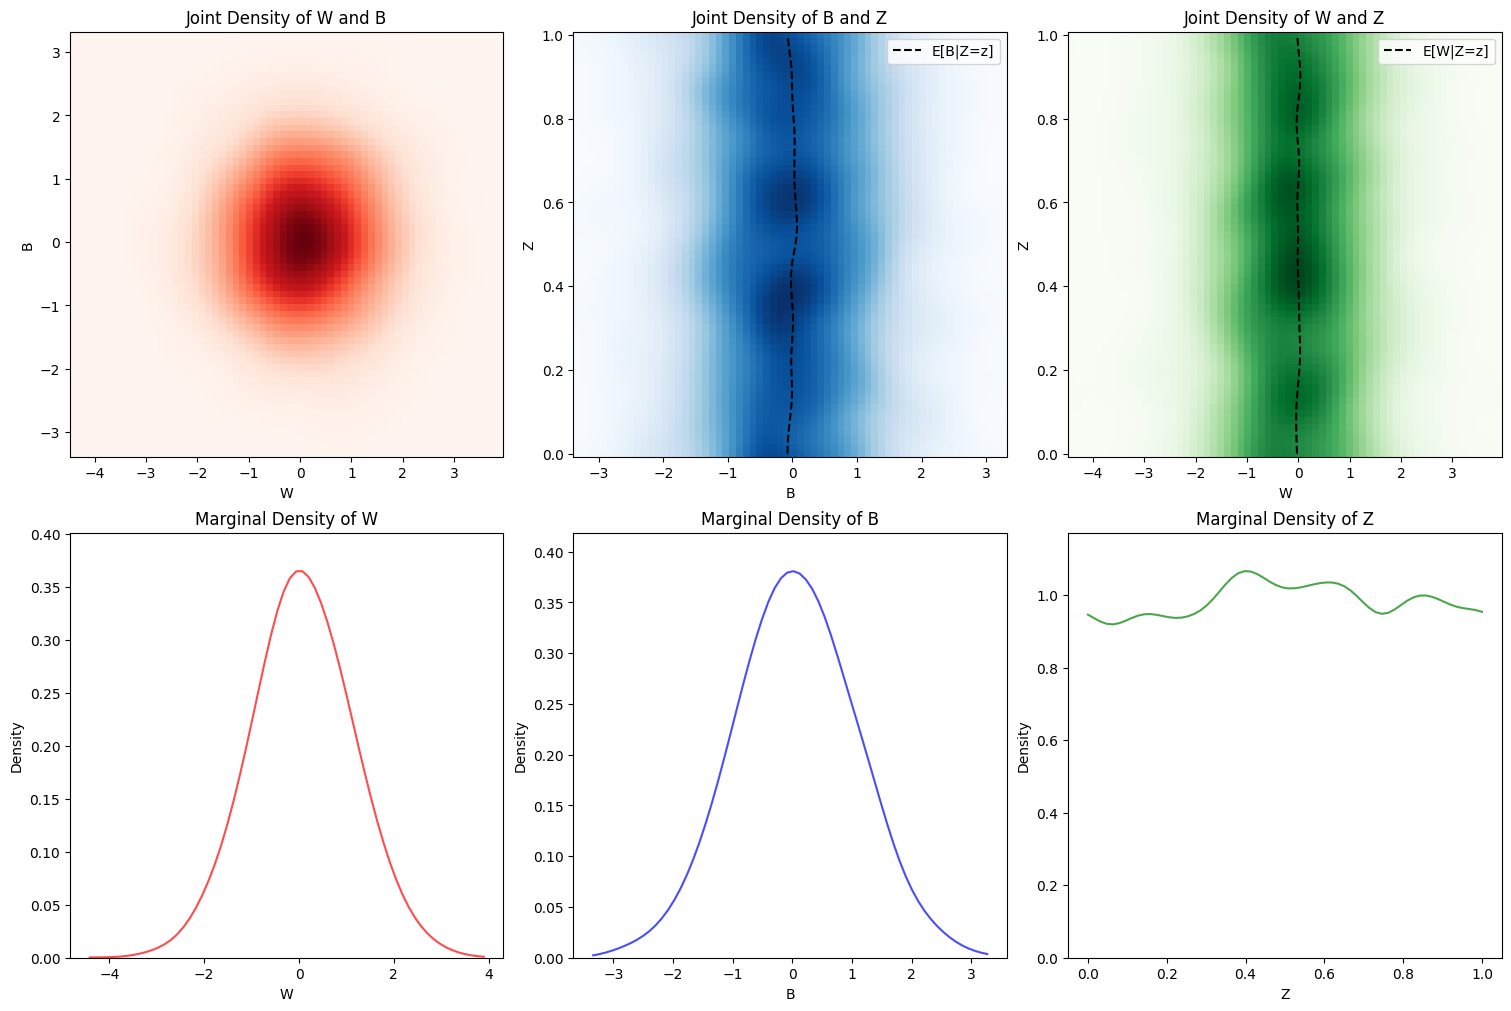

t = 0.500, KE = 25.48820, <WB> = -0.99134 



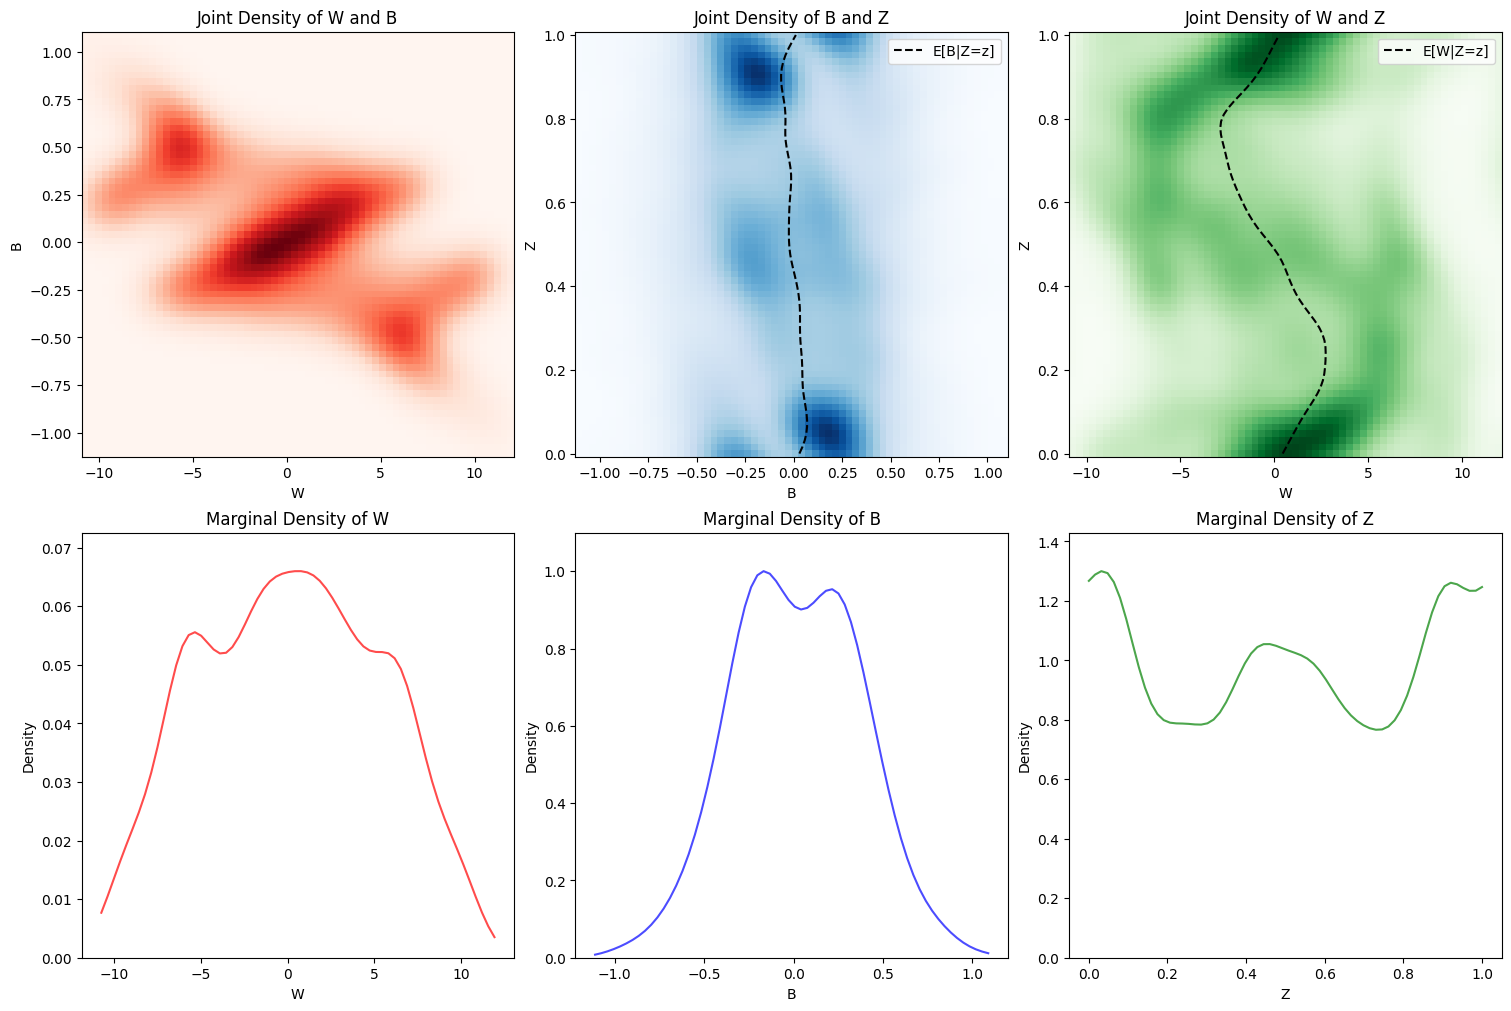

t = 1.000, KE = 23.72127, <WB> = -0.70504 



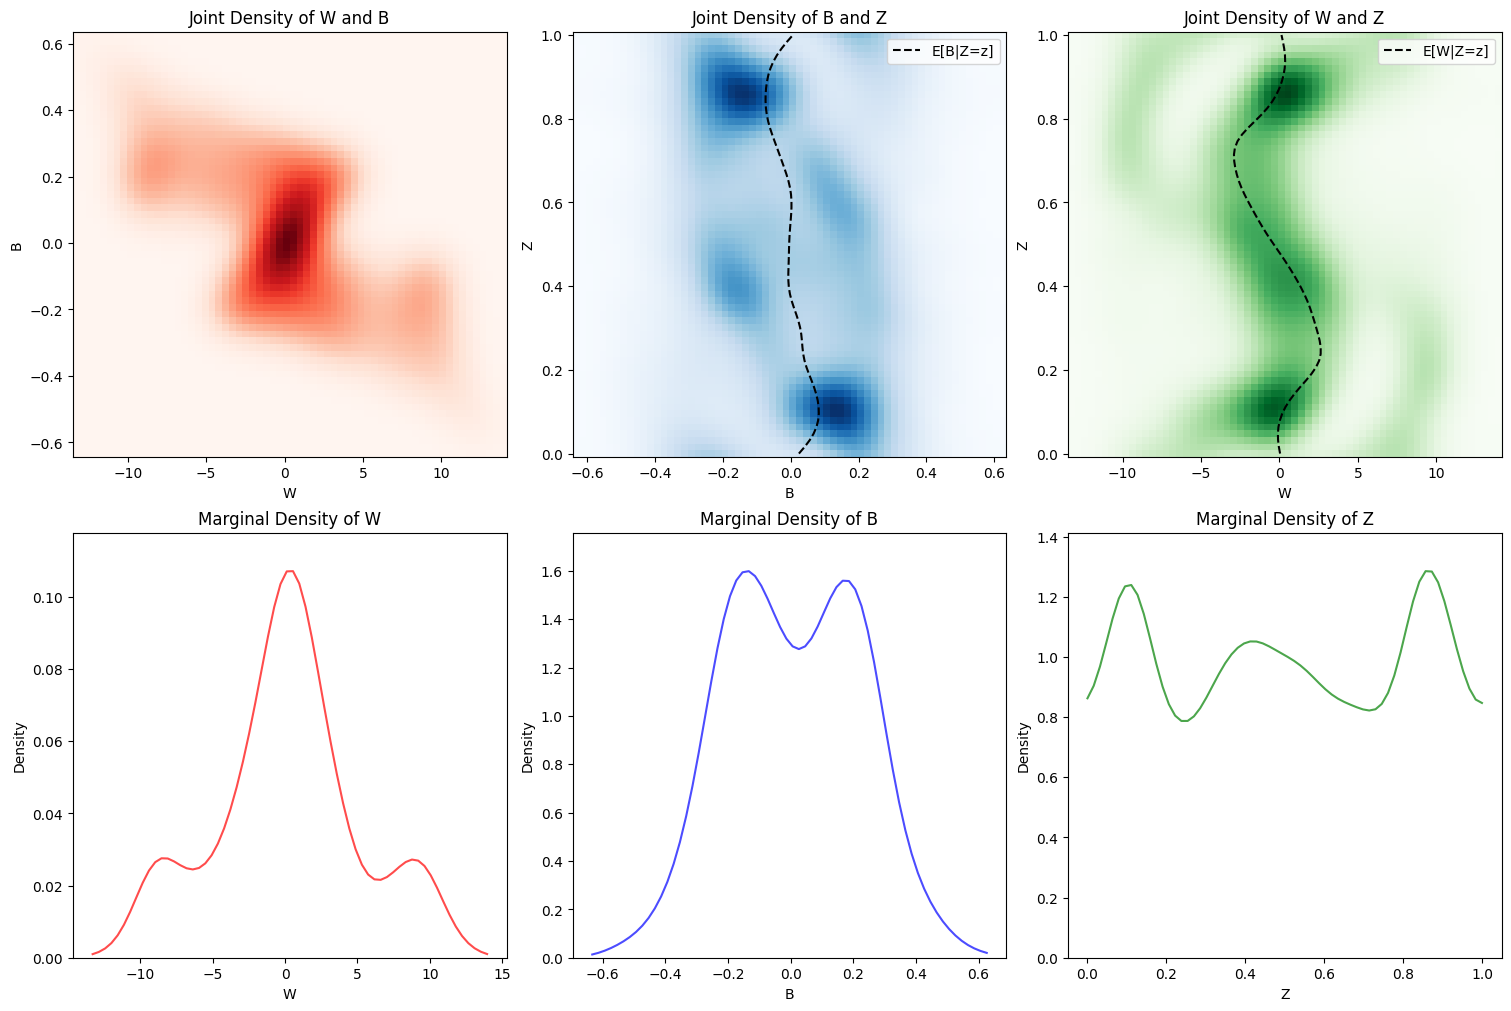

t = 1.500, KE = 22.04847, <WB> = -0.53298 



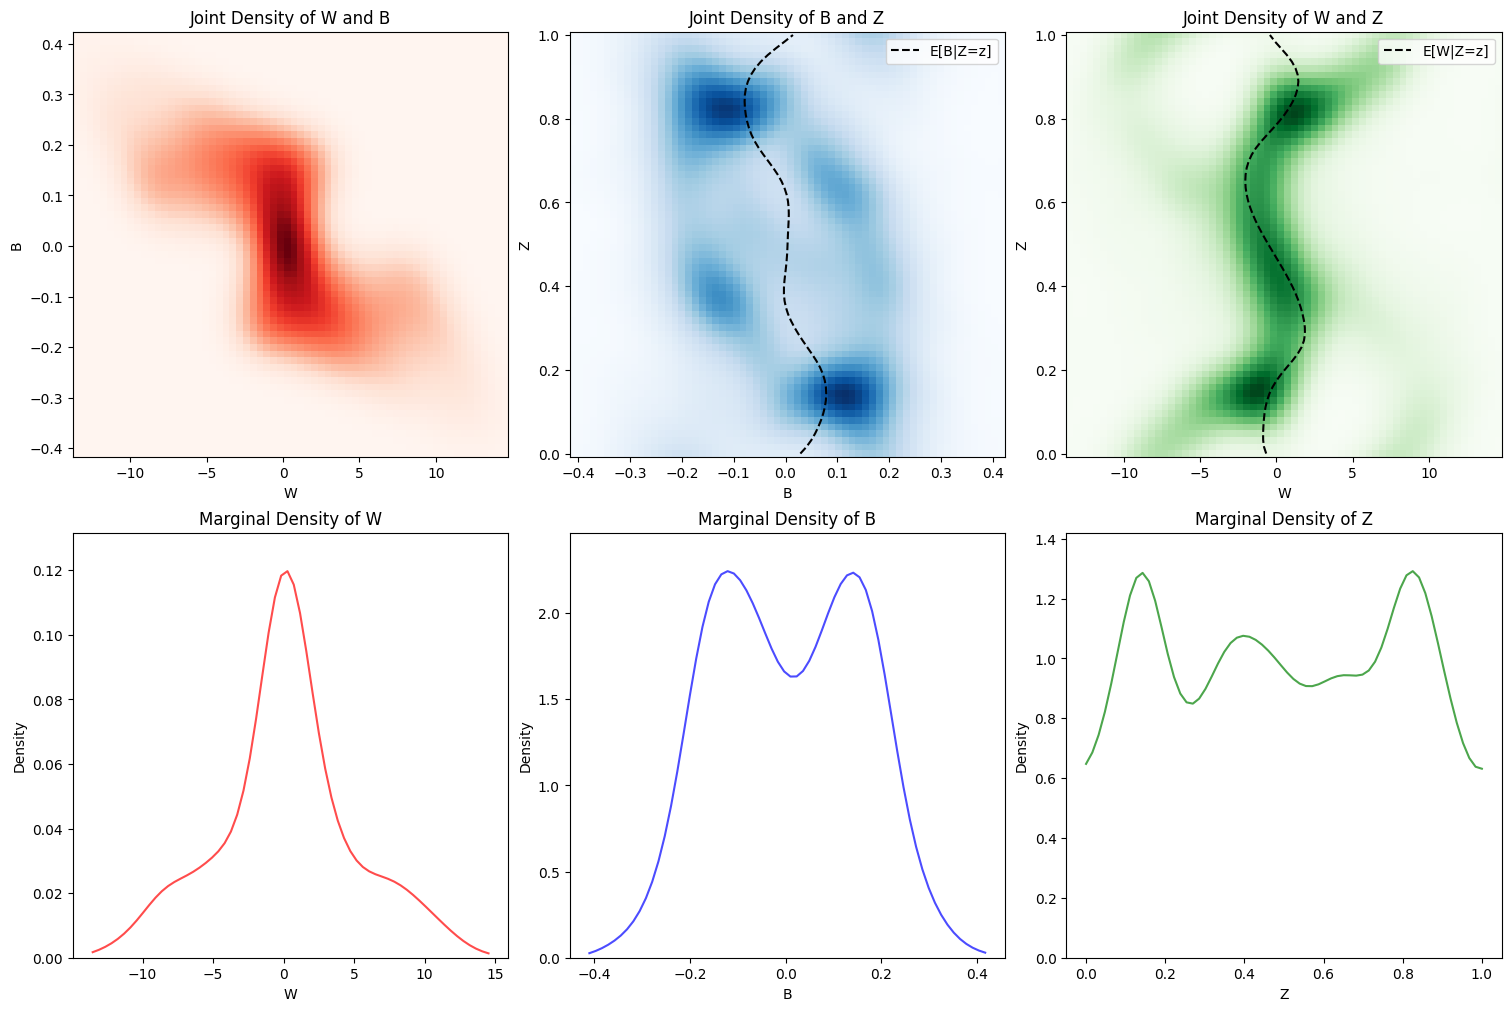

t = 2.000, KE = 21.21201, <WB> = -0.41405 



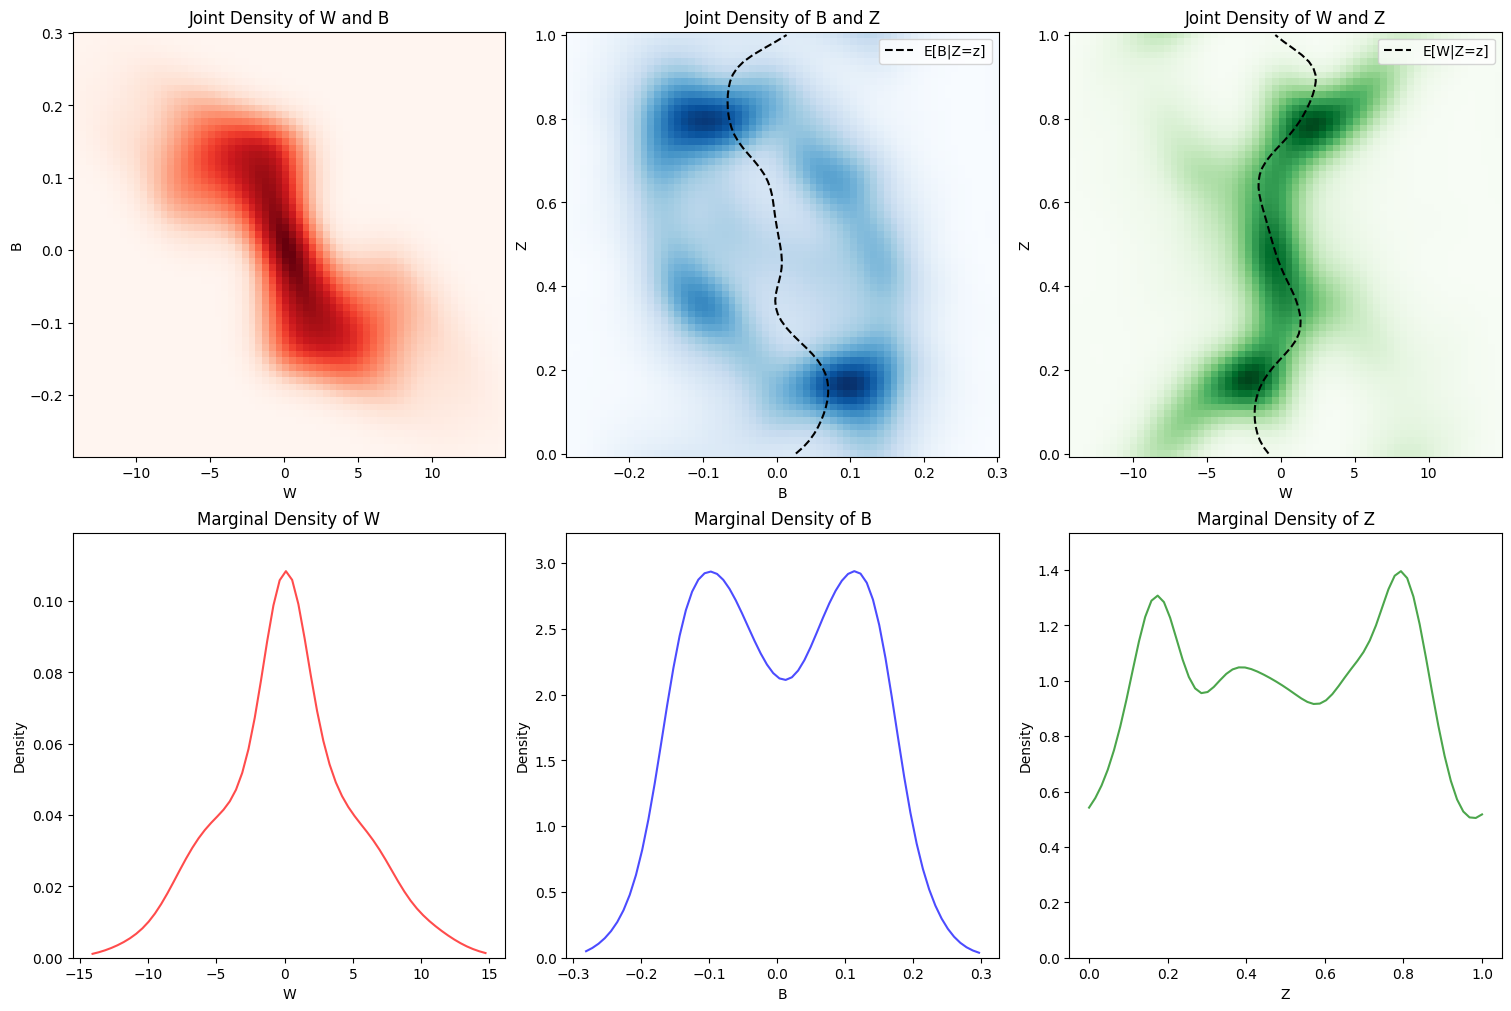

t = 2.500, KE = 20.79493, <WB> = -0.32334 



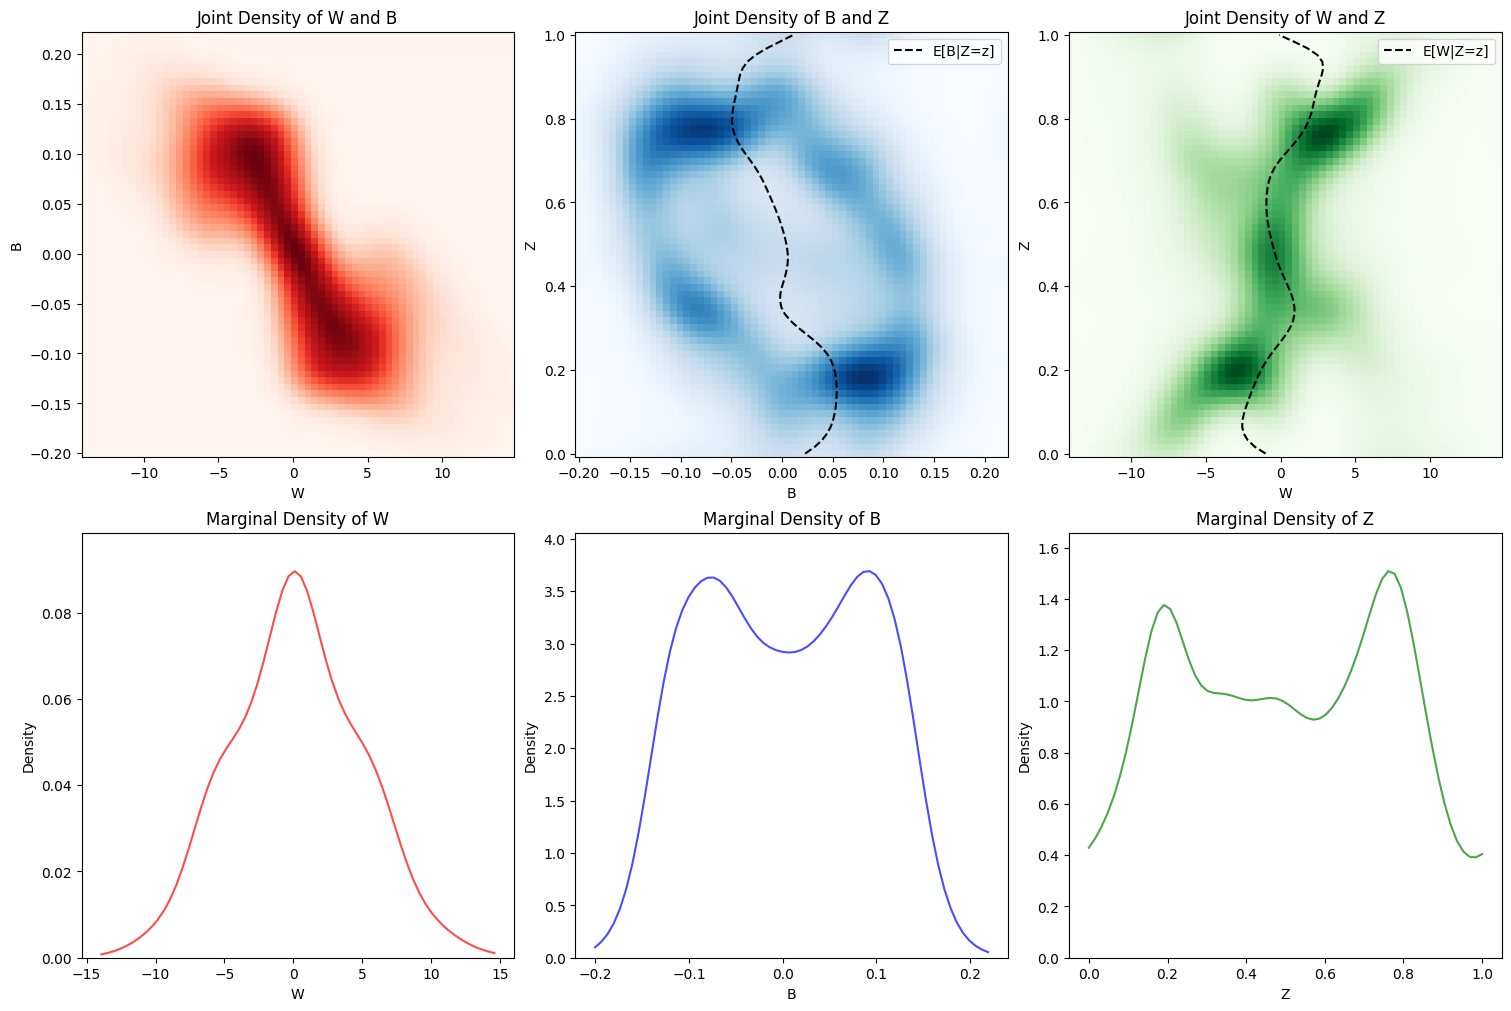

t = 3.000, KE = 20.45258, <WB> = -0.24828 



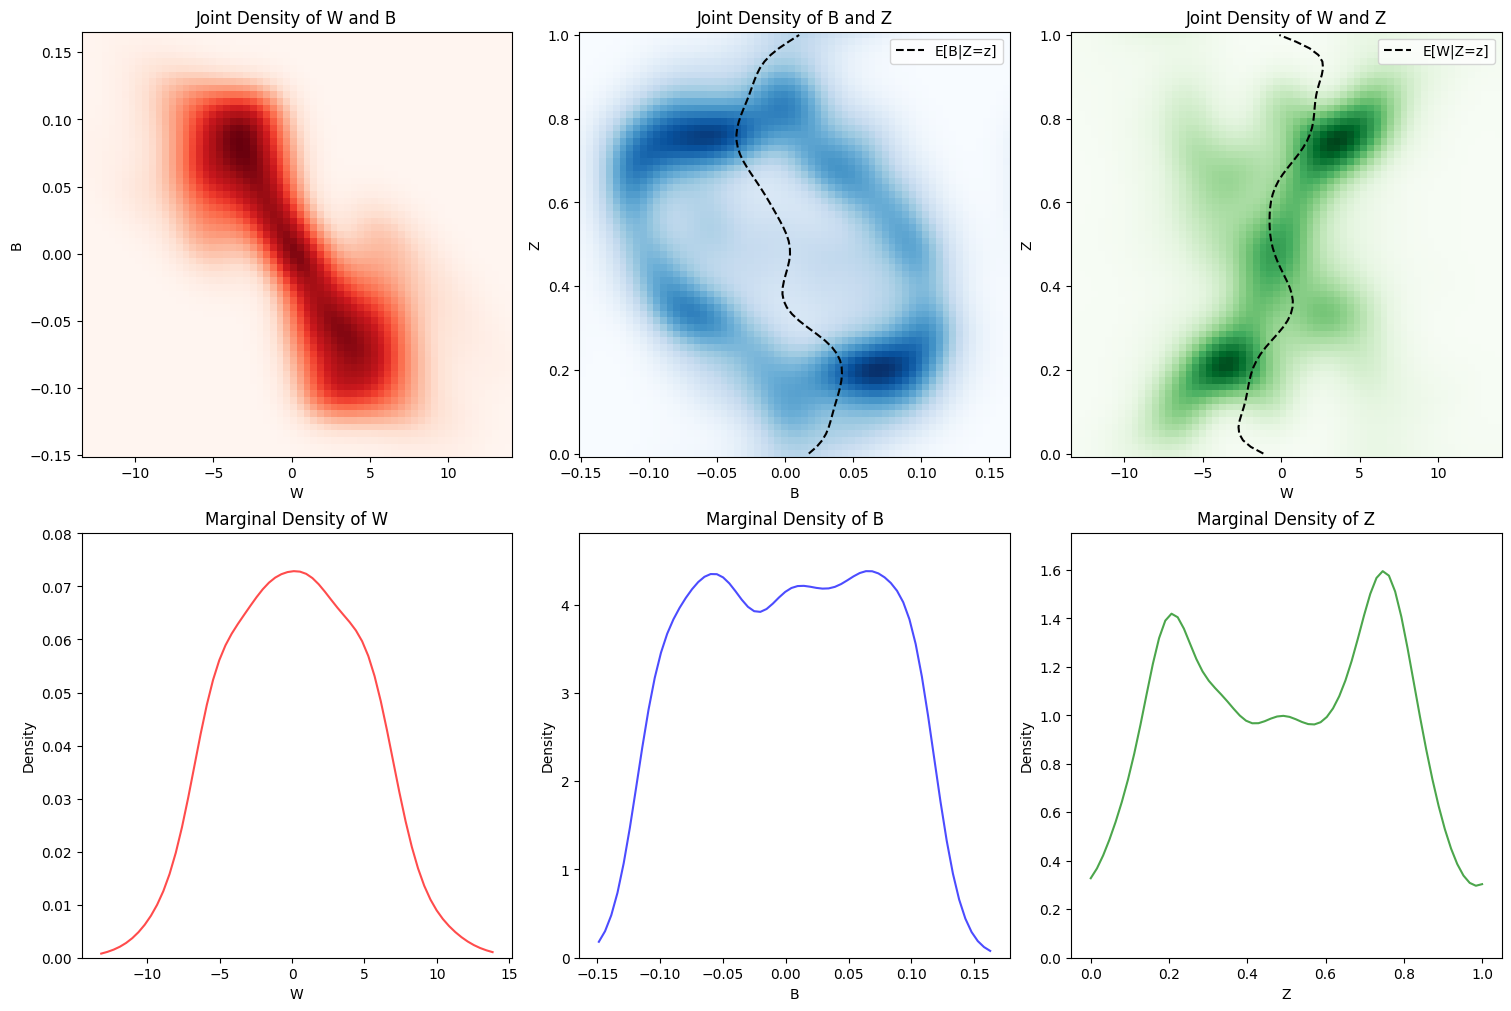

t = 3.500, KE = 19.98708, <WB> = -0.18322 



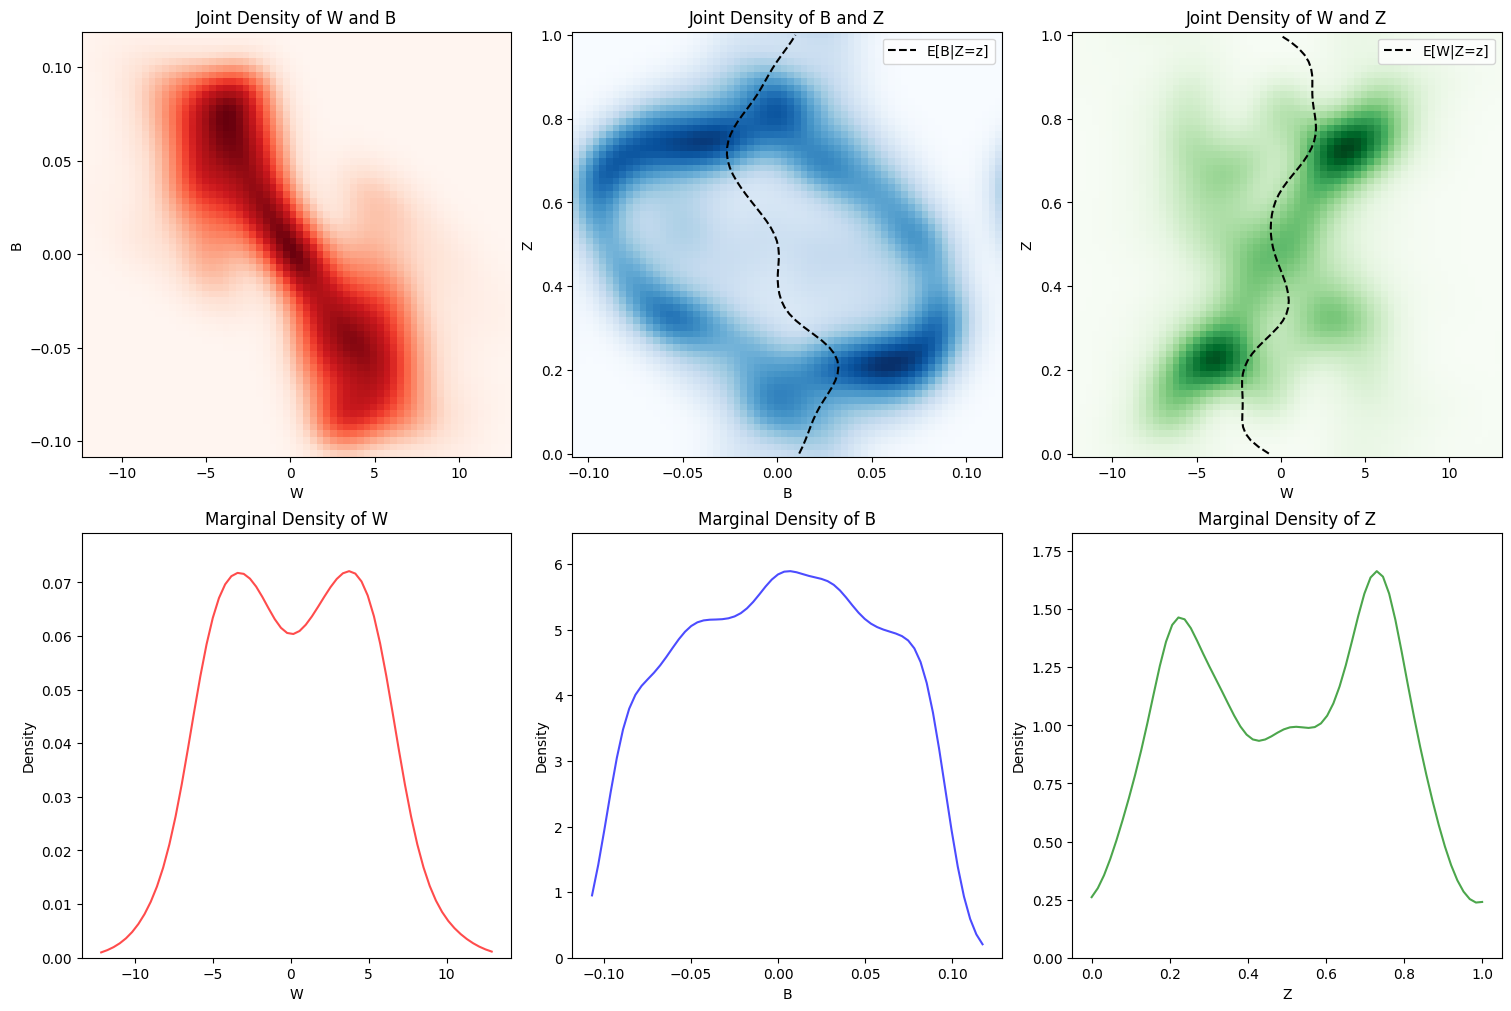

t = 4.000, KE = 19.28826, <WB> = -0.12583 



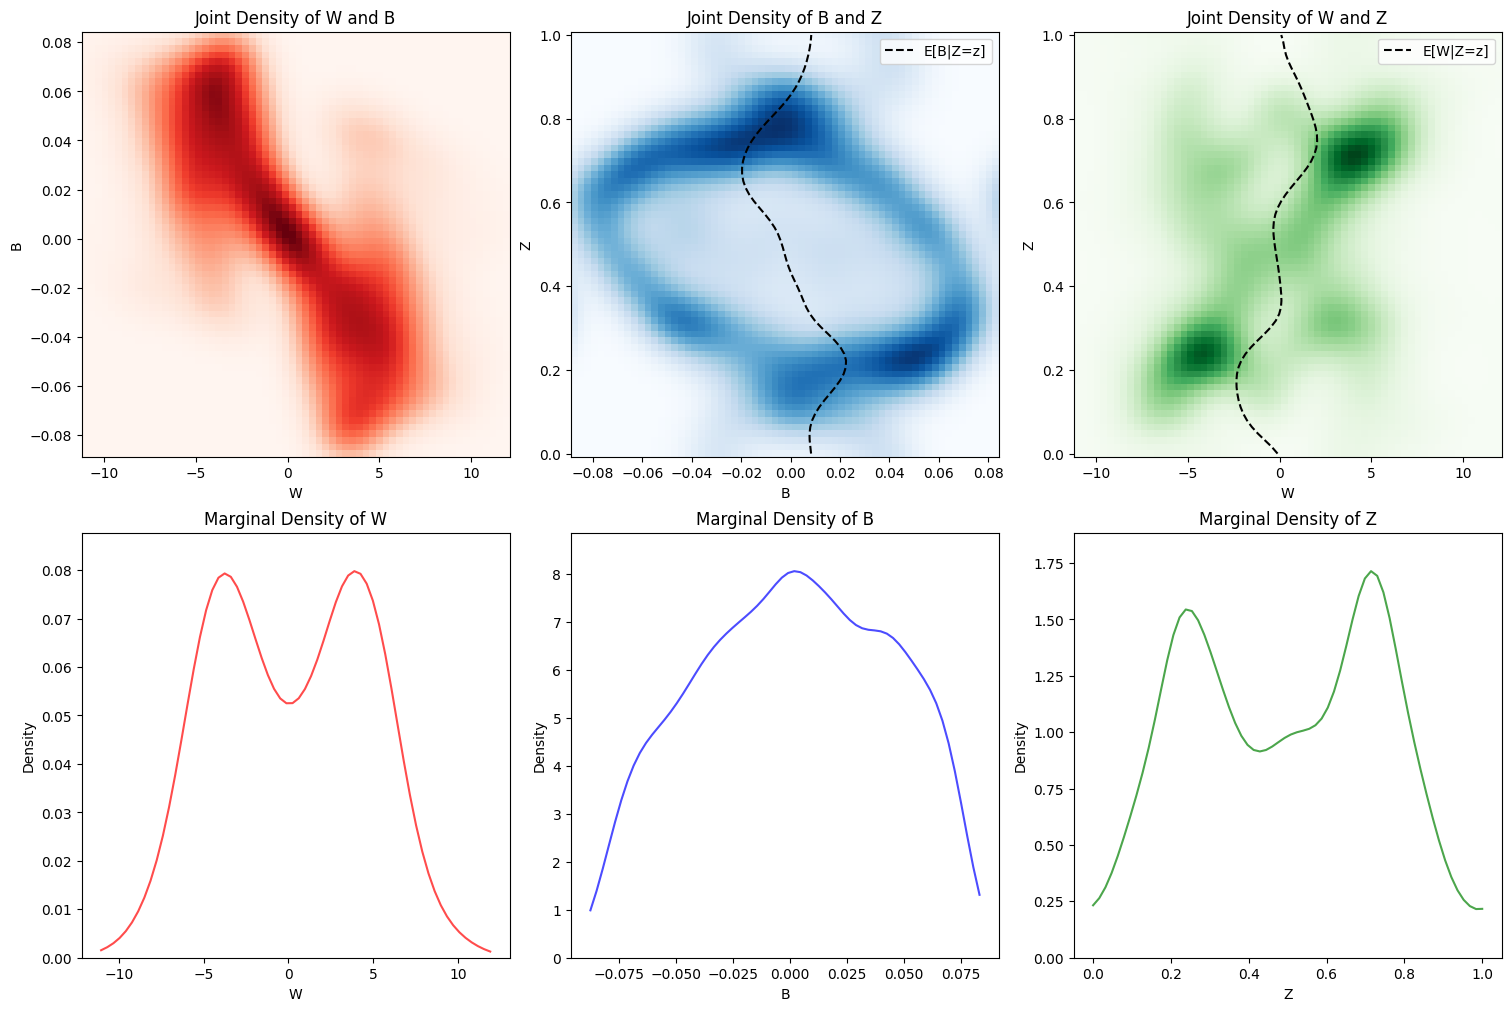

t = 4.500, KE = 18.29827, <WB> = -0.07519 



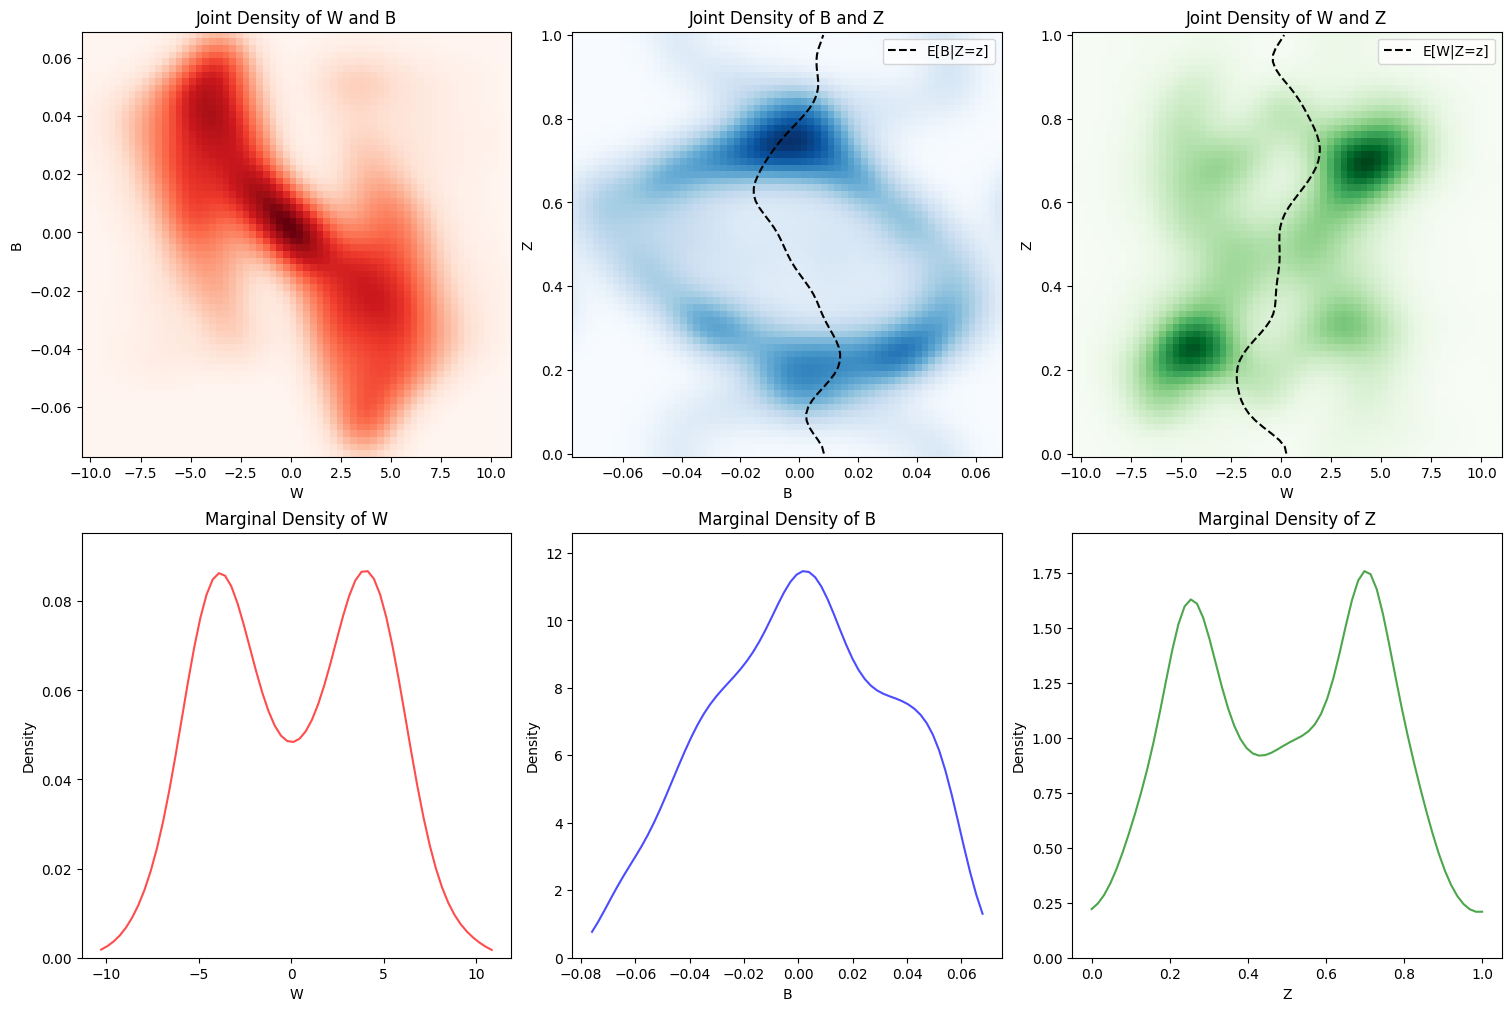

t = 5.000, KE = 17.00848, <WB> = -0.03147 



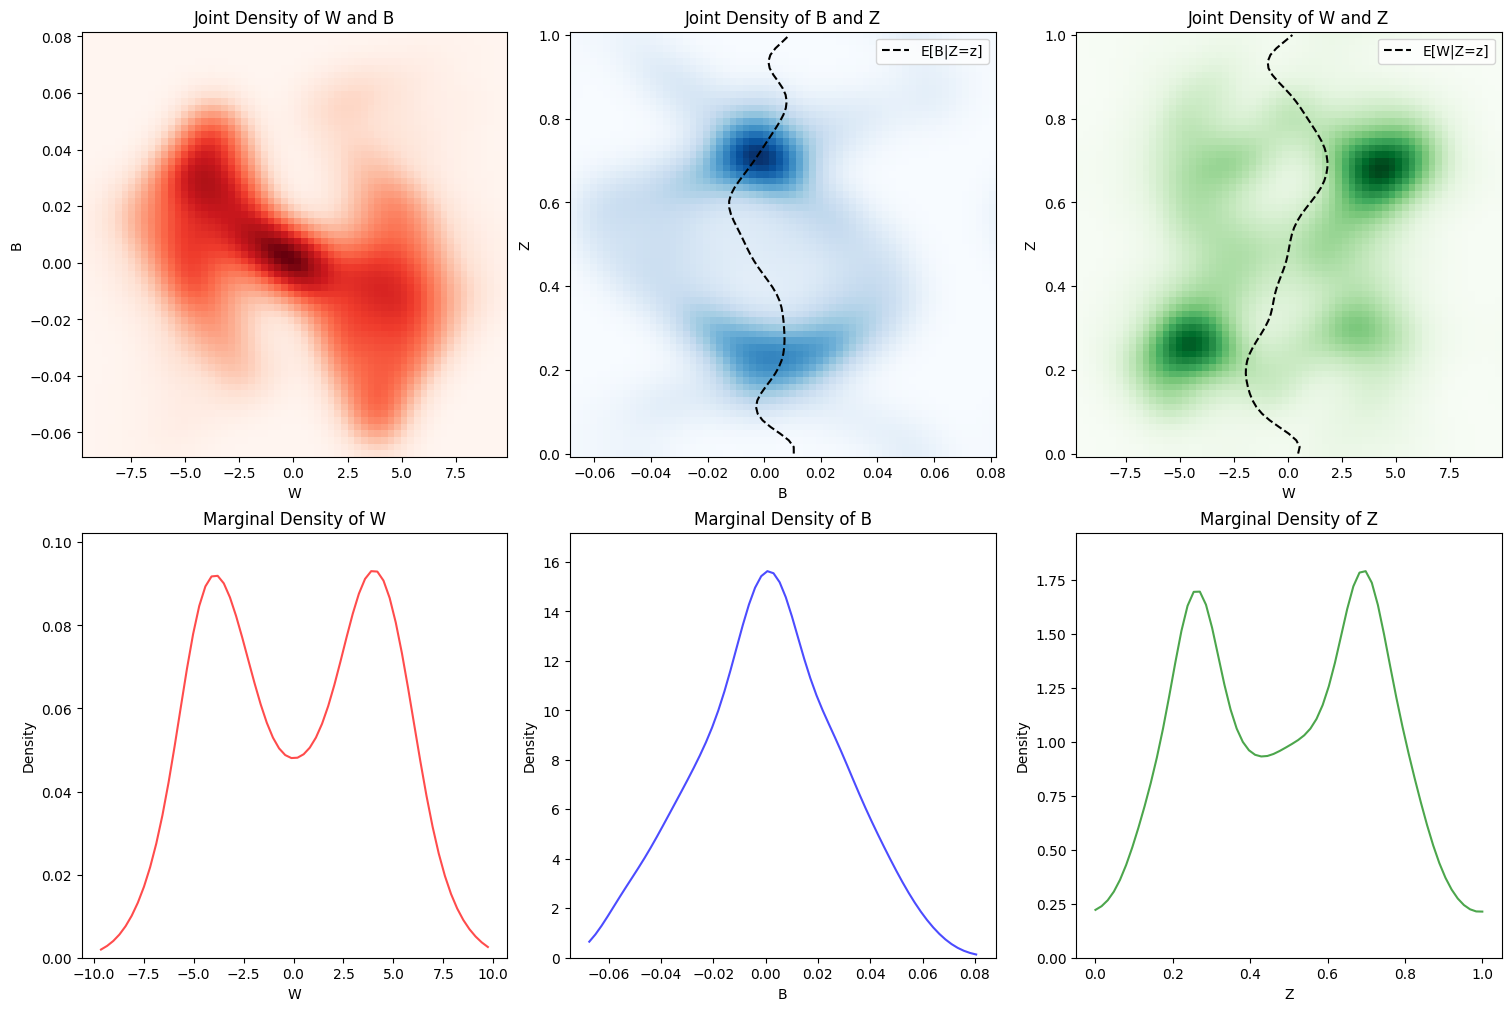

< |Ri * E[WB] - α_W * E[W^2] + 1| >_T = 250.91117
< |E[WB] + α_B * E[B^2]| >_T = 0.06935


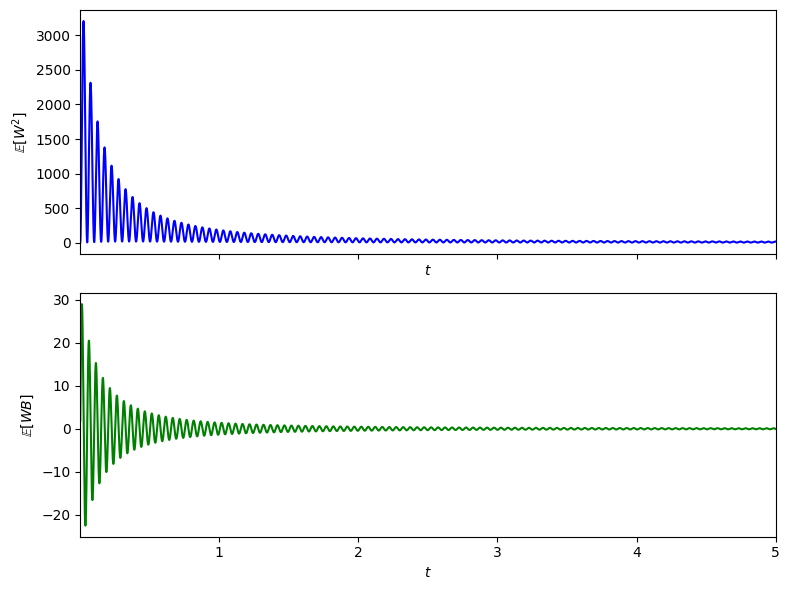

In [6]:
# Particles 
N_particles = 2**12
N_grid = np.sqrt(N_particles).astype(int)  # As Ensures O(N + NlogN) 

# Bandwidth/ smoothing length
h = 0.05

# Time
T = 5
Δt= 5e-05

# Run the solver
# import time
# start_time = time.time()
# solver(T, Δt, num_particles=N_particles, num_bins=N_grid, h=h, plot=False)
# end_time = time.time()
# print(f"Execution time: {end_time - start_time:.2f} seconds")

KE, B2, WB, time = solver(T, Δt, num_particles=N_particles, num_bins=N_grid, h=h, plot=True)

budget = abs( Ri_B * np.mean(WB) - α_W * np.mean(KE) + 1 )
print(f"< |Ri * E[WB] - α_W * E[W^2] + 1| >_T = {budget:.5f}")

budget = abs( np.mean(WB) + α_B * np.mean(B2) )
print(f"< |E[WB] + α_B * E[B^2]| >_T = {budget:.5f}")

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot x(t)
st = 10
axs[0].plot(time[st:], KE[st:], color='blue')
axs[0].set_ylabel(r'$\mathbb{E}[W^2]$')
axs[0].set_xlabel(r'$t$')
axs[0].set_xlim([time[st:][0],T])

# Plot y(t)
axs[1].plot(time[st:], WB[st:], color='green')
axs[1].set_ylabel(r'$\mathbb{E}[WB]$')
axs[1].set_xlabel(r'$t$')
axs[1].set_xlim([time[st:][0],T])

# Layout adjustment
plt.tight_layout()
plt.show()